# Assignment: Linear and logistic regression

## Objectives

The objectives of this assignment are:
1. to learn to use linear regression for predicting continuously varying target variables 
2. to learn to use logistic regression for binary classification
3. to learn to estimate the relative importance of input features

## Setup

In this assignment, use the Real Estate Valuation dataset that is available at [https://archive.ics.uci.edu/dataset/477/real+estate+valuation+data+set](https://archive.ics.uci.edu/dataset/477/real+estate+valuation+data+set). The data is collected from New Taipei City, Taiwan. 

## Task

The assignment consists of constructing *two* separate models for predicting the real estate prices in the dataset: one with linear and one with logistic regression.

1. **Linear regression model**: construct a linear regression model for predicting the continuous target variable "Y house price of unit area" in the dataset.

2. **Logistic regression model**: convert the target variable into a binary-valued one according to whether the original target value is above or below the average house price of unit area (within the training set samples), and construct a binary classifier for predicting its value with logistic regression.

Both models should be validated, with appropriate metrics presented and discussed. 

Remember to draw conclusions from your results and interpret your findings! Can you e.g. estimate which of the input variables has the most important role when predicting the house prices, and which ones are less important? Also, give some thought to whether the input data should be standardized before modeling or not. 

Prepare a Jupyter notebook containing a full account of the problem treatment. Construct your notebook to include sections for each of the six separate stages in the CRISP-DM model, with appropriate contents (include subsections for the two separate tasks in "Modeling" and "Evaluation").


## Business Understanding

The aim of this assignment is to predict real estate prices using the Real Estate Valuation dataset from New Taipei City, Taiwan. Two models are included: first, a linear regression model to predict the continuous target variable “house price of unit area,” and second, a logistic regression model to classify whether the price is above or below the average value in the training set.


## Data understanding
Dataset is imported from UC Irvine Machine Learning Repository, by using their python package. It consists of real estate valuation data taken from Sindian Dist., New Taipei City, Taiwan.


In [44]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
real_estate_valuation = fetch_ucirepo(id=477) 
  
# data (as pandas dataframes) 
X = real_estate_valuation.data.features 
y = real_estate_valuation.data.targets

# Combining features and target variable into a single dataframe
df = X.copy()
df['Y house price of unit area'] = y
display(X.head())


,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
0,2012.917,32.0,84.87882,10,24.98298,121.54024
1,2012.917,19.5,306.59470,9,24.98034,121.53951
2,2013.583,13.3,561.98450,5,24.98746,121.54391
3,2013.500,13.3,561.98450,5,24.98746,121.54391
4,2012.833,5.0,390.56840,5,24.97937,121.54245


There are 6 features and one target variable in the dataset and 414 instances.
Feature types are integer and float.  

In [45]:
# variable information 
display(real_estate_valuation.variables) 

,name,role,type,demographic,description,units,missing_values
0,No,ID,Integer,None,None,None,no
1,X1 transaction date,Feature,Continuous,None,"for example, 2013.250=2013 March, 2013.500=201...",None,no
2,X2 house age,Feature,Continuous,None,None,year,no
3,X3 distance to the nearest MRT station,Feature,Continuous,None,None,meter,no
4,X4 number of convenience stores,Feature,Integer,None,number of convenience stores in the living cir...,integer,no
5,X5 latitude,Feature,Continuous,None,"geographic coordinate, latitude",degree,no
6,X6 longitude,Feature,Continuous,None,"geographic coordinate, longitude",degree,no
7,Y house price of unit area,Target,Continuous,None,"10000 New Taiwan Dollar/Ping, where Ping is a ...",10000 New Taiwan Dollar/Ping,no


Most of these variables have to do with the location of the house. Transaction date is the date when the house is valued, and house age is the age of the house at the time of valuation. Distance to the nearest metro station and number of convenience stores are self explanatory. The data is collected from a time period of approximately one year, from 2012 to 2013.

### Plotting the data

Here we display scatter plots of each variable in the dataset. On x axis is the variable, and on y axis is the corresponding house value.

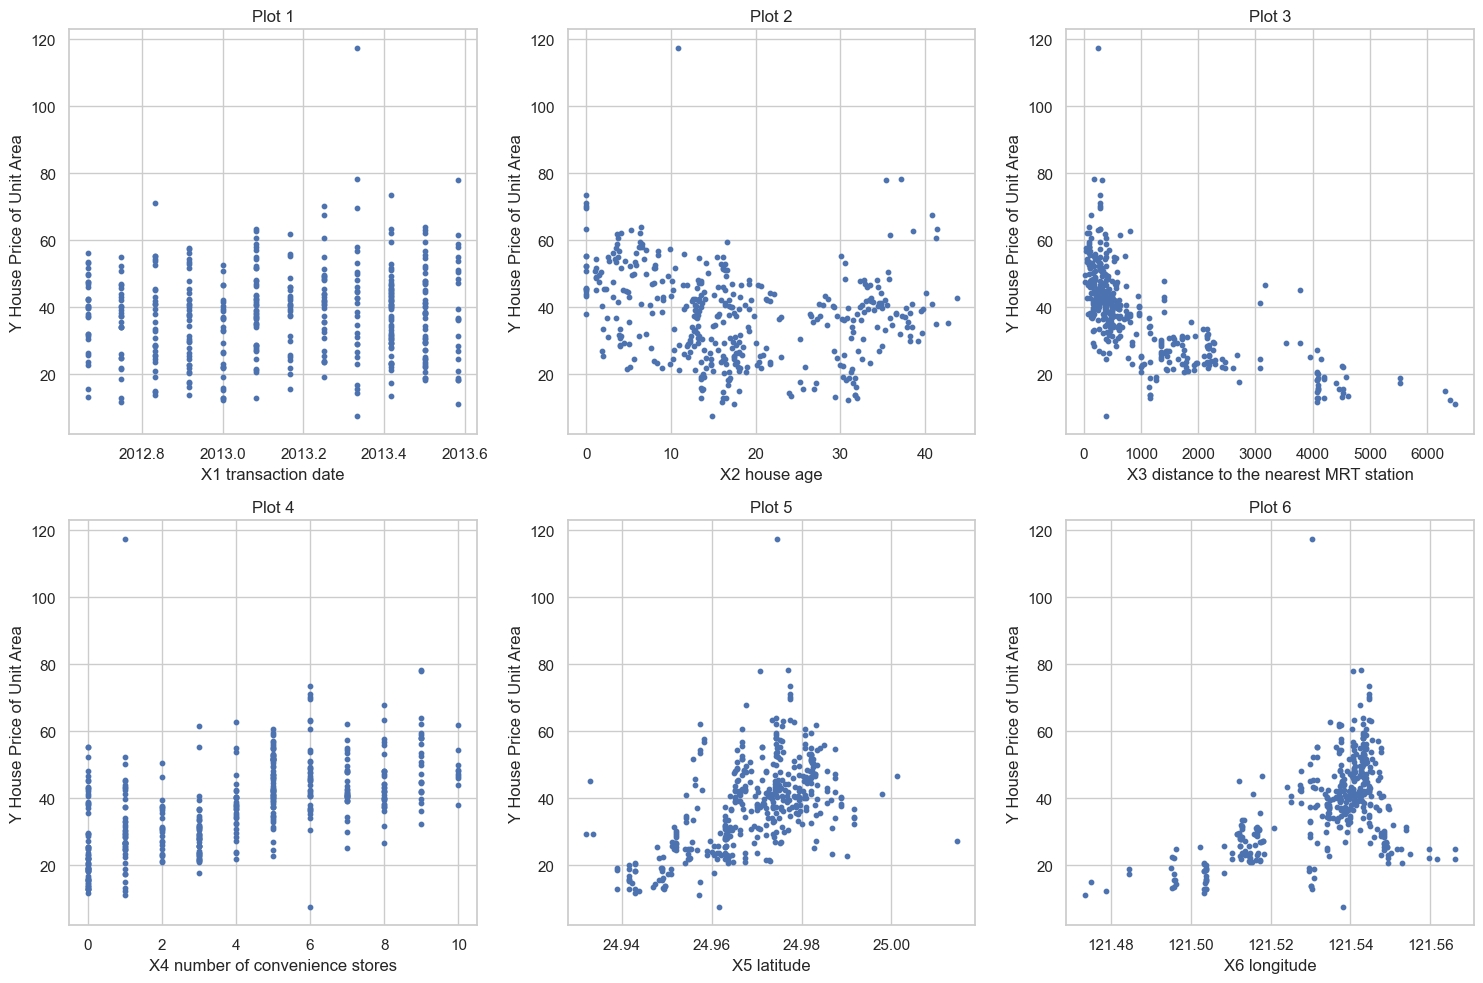

In [46]:
import matplotlib.pyplot as plt

number_of_plots = len(X.columns)

rows, cols = (number_of_plots + 2) // 3, 3  
fig, axes = plt.subplots(rows, cols, figsize=(15, 5*rows))
axes = axes.flatten()

for i, col in enumerate(X.columns):
    axes[i].scatter(X[col], y, s=10)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Y House Price of Unit Area')
    axes[i].set_title(f"Plot {i+1}")

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


From these plots we can see that most of the features don't correlate linearly, but some values have visible correlation structure in them. Most structured features seem to be distance from nearest metro station and longitude of the property. This tells us, that linear regression might not be the best model to use with this data due to the lack of correlation structure.

We also wanted to print a 3d plot for the latitude and longitude values, as these features are related to each other. House value is shown on the y-axis.

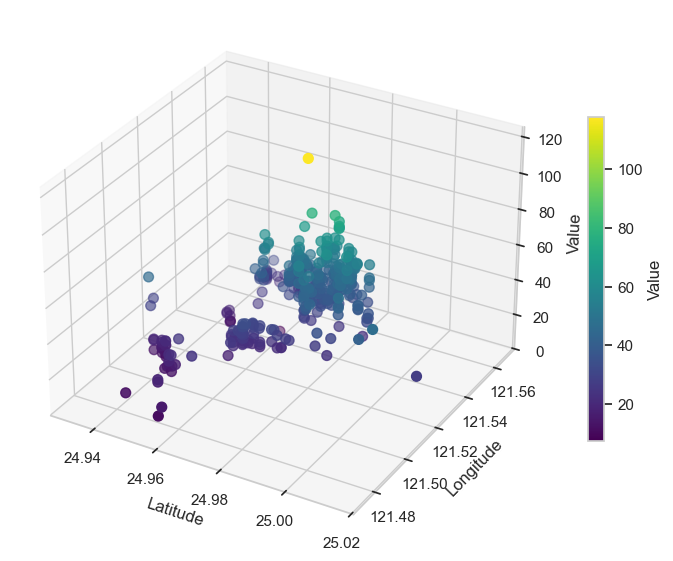

In [47]:
import seaborn as sns

lat = df["X5 latitude"]
lon = df["X6 longitude"]
value = df["Y house price of unit area"]

sns.set(style="whitegrid")

# Create 3D figure
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection="3d")

# Scatter plot in 3D
sc = ax.scatter(lat, lon, value, c=value, cmap="viridis", s=50)

# Add labels
ax.set_xlabel("Latitude")
ax.set_ylabel("Longitude")
ax.set_zlabel("Value")

# Add colorbar
plt.colorbar(sc, ax=ax, shrink=0.6, label="Value")

plt.show()

## Data preparation

At this point we prepared the data to be used with both linear regression and logistic regression. 

Here we change the datatypes for all columns to float. The models need float instead of int.

In [48]:
for col in X.columns:
    if X[col].dtype != 'float64':
        X[col]=X[col].astype(dtype='float64')

# All features are now float64
display(df.head())

C:\Users\OMISTAJA\AppData\Local\Temp\ipykernel_5560\1829512367.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col]=X[col].astype(dtype='float64')


,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


First we split the dataset into training and testing data. We chose to split 70% training data, and 30% for testing.

In [49]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

Here the data is normalized. We create the scaler that we will use on all data.
The data normalization is not required for logistic regression or linear regression, but is a good practice to standardize the features, because it makes the model more robust and easier to interpret.

In [50]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Standardize features
scaler = StandardScaler()

X_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X.columns)
X_test_scaled = pd.DataFrame(scaler.fit_transform(X_test))
# First 10 rows of scaled features
display(X_scaled.head(10))

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
0,0.950982,-0.090643,-0.543453,0.674242,-0.454699,0.613246
1,-1.719796,-1.012062,-0.776334,1.703411,0.374279,0.637070
2,0.356289,-0.116477,-0.211978,-0.011870,0.742082,0.092326
3,-0.829537,0.830776,2.586040,-1.041039,-1.575159,-2.404098
4,-0.829537,-0.383430,-0.463788,0.331186,-0.371071,0.268112
5,1.246548,0.727439,2.669218,-1.384095,-1.742416,-2.404098
6,0.950982,-0.478156,1.620312,-1.384095,2.551868,-0.994588
7,0.950982,-1.279015,0.362368,-0.354927,0.043824,-1.080871
8,-1.719796,0.236590,0.853136,-0.354927,-0.527773,-1.341653
9,-0.533971,0.133253,-0.061605,-1.384095,-0.499355,1.049814


## Modeling: Linear Regression



Here we build regression model and train it with the scaled dataset.

In [51]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_scaled,y_train)


LinearRegression()

Here we get the start value of y (intercept) when x is zero. We also print the coefficients of the function for each variable.

In [52]:
# Intercept (scalar)
b0 = model.intercept_.item()

# Coefficients (1D array)
coefs = model.coef_.ravel()

print(f"Intercept: {b0:.2f}")
for col, coef in zip(X.columns, coefs):
    print(f"{col}: {coef:.4f}")

Intercept: 38.20
X1 transaction date: 1.5032
X2 house age: -3.0049
X3 distance to the nearest MRT station: -6.0670
X4 number of convenience stores: 3.1549
X5 latitude: 2.7356
X6 longitude: -0.4031


Higher coefficients mean that the value correlates more strongly with the house value. Based on these values, the highest correlations are with distance to nearest metro station.

### Plotting the linear regressions

Here we print out the regression lines and the normalized scatter plots for each variable.

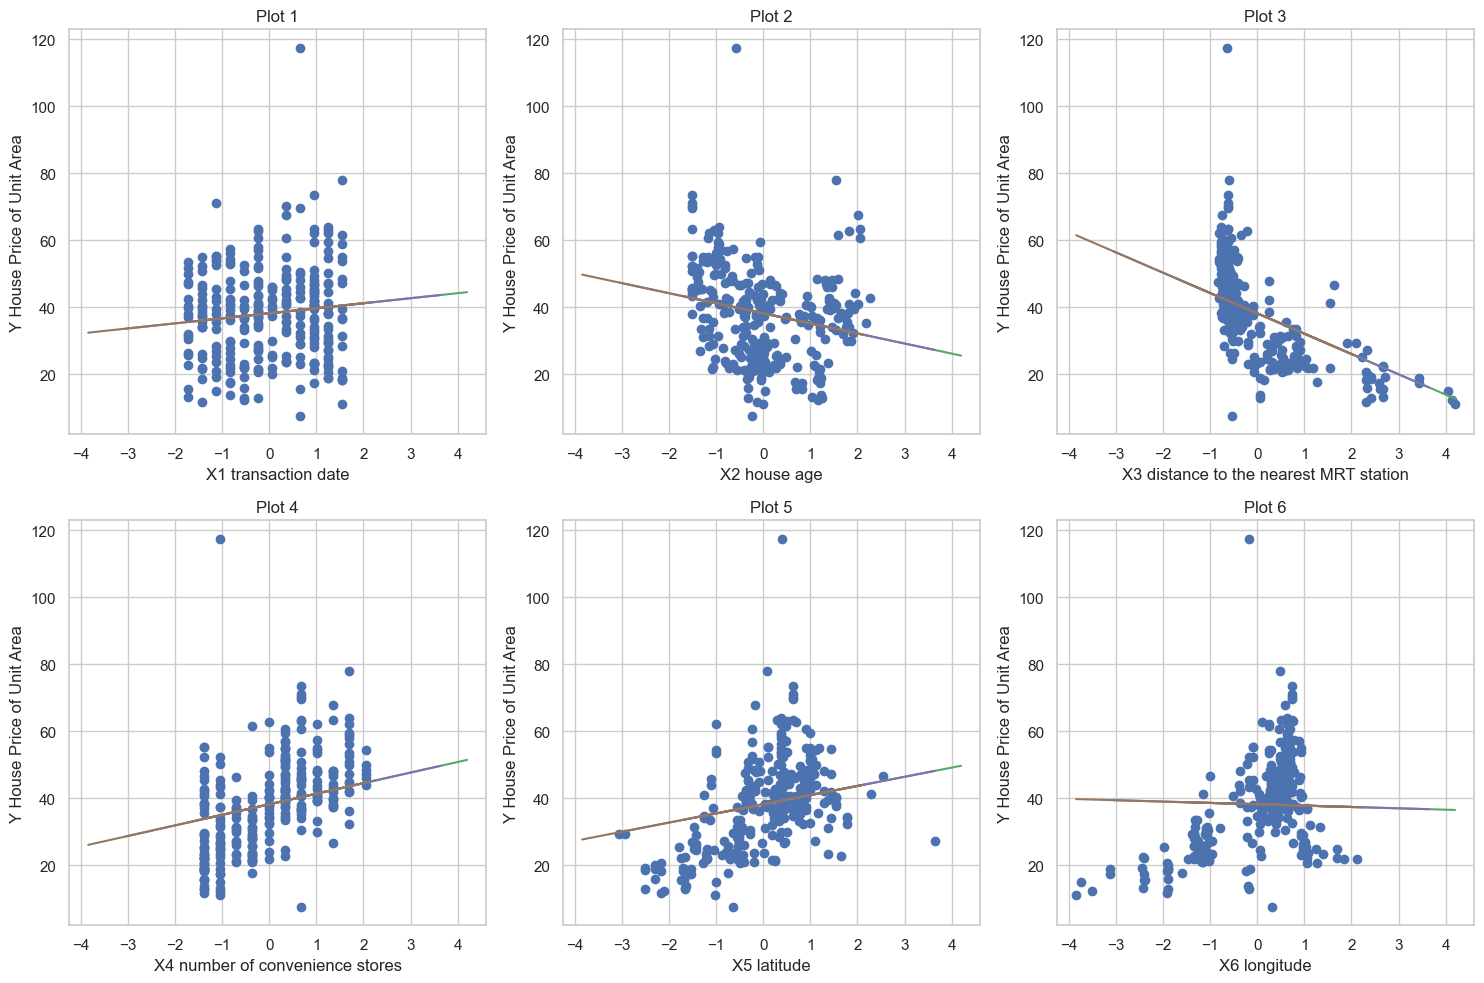

In [61]:
import numpy as np

feature_cols = X_scaled.columns
number_of_plots = len(feature_cols)

rows, cols = (number_of_plots + 2) // 3, 3  
fig, axes = plt.subplots(rows, cols, figsize=(15, 5*rows))
axes = axes.flatten()

for i, col in enumerate(feature_cols):
    xs = np.linspace(X_scaled.min(), X_scaled.max())

    ys = b0 + coefs[i] * xs
    axes[i].plot(xs, ys)
    axes[i].scatter(X_scaled[col], y_train)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Y House Price of Unit Area')   
    axes[i].set_title(f"Plot {i+1}")
    

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

From these plots we can see the correlations to the values. The normalized data can be seen here from -4 to 4. 

### Regression metrics

Here we print out the mean absolute error of the regression model. This value tells the mean of how much the actual values differ from the regression lines. These are calculated using the normalized values.

In [54]:
from sklearn.metrics import mean_absolute_error

preds = model.predict(X_test_scaled)

print("Mean absolute error: %.2f" % mean_absolute_error(y_test, preds))

Mean absolute error: 5.36


C:\Users\OMISTAJA\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


From the mean absolute error value of 5.36. This mean that our model deviates from the price value approximately 5.36 value units on average.

## Modeling: Logistic Regression

First we convert the target value into binary. We calculate the average house price, and see if the price is over or under the average. 1 is over, and 0 is under.

In [55]:
# Calculate average
y_avg = np.average(y_test)
display(f"Average price: {y_avg:.4f}")

# Transform y into binary: 0 if under average, 1 if equal or above
y_binary = (y_train >= y_avg).astype(int)
y_binary_test = (y_test >= y_avg).astype(int)
display(y_binary[:10])

'Average price: 37.4640'

,Y house price of unit area
246,1
342,1
157,0
232,0
12,1
30,0
228,1
279,0
369,0
248,0


## Building and validating a logistic regression model

Here we build the logistic regression model using the scaled training data and the binary target values. We also print out the coefficients of the model.

In [62]:
from sklearn.linear_model import LogisticRegression

# Build and fit model
reg = LogisticRegression(solver="lbfgs")
reg.fit(X_scaled, y_binary.values.ravel())

# Put coefficients into a DataFrame with feature names
coef_df = pd.DataFrame({
    "Feature": X_scaled.columns,
    "Coefficient": reg.coef_[0]
})

# Print results
print("Intercept:", reg.intercept_[0])
print("\nCoefficients:")
display(coef_df)

Intercept: -0.6029347425235346

Coefficients:


,Feature,Coefficient
0,X1 transaction date,0.262571
1,X2 house age,-0.739653
2,X3 distance to the nearest MRT station,-2.428752
3,X4 number of convenience stores,0.653158
4,X5 latitude,1.256712
5,X6 longitude,0.240453


Here we can clearly see that the most important values for the value estimation are distance to metro station and latitude.

### Evaluation of the model

Here we evaluate the model using confusion matrix, cross-validation and accuracy scoring.

Accuracy: 0.84
Confusion Matrix:
 [[46 12]
 [ 8 59]]


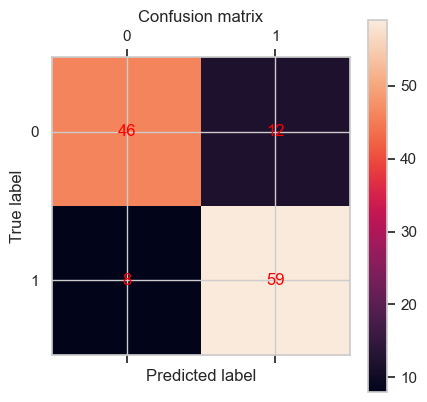

In [57]:
# cross-validation
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score

y_pred = cross_val_predict(estimator=reg, X=X_test_scaled, y=y_binary_test.values.ravel(), cv=10)

cm = confusion_matrix(y_binary_test.values.ravel(), y_pred)
accuracy = accuracy_score(y_binary_test.values.ravel(), y_pred)

print("Accuracy: %0.2f" % accuracy)
print("Confusion Matrix:\n", cm)

# visualize confusion matrix
plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
# include counts
for i in range(2):
    for j in range(2):
        plt.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

The accuracy of our model on the test data is 84%. The correlation matrix revealed that our model got 20 predictions wrong, and 105 correct.

## Getting probability estimates

Here we use a imaginary house data to generate prediction with the model.

In [58]:
features = ['X1 transaction date','X2 house age','X3 distance to the nearest MRT station','X4 number of convenience stores','X5 latitude','X6 longitude']
values = [2013.917,15.5,400.5,2.0,24.98034,121.53951]

Xi = pd.DataFrame([values],columns=features)
    
# get probability estimate
Xi = pd.DataFrame(scaler.transform(Xi), columns=Xi.columns)
p = reg.predict_proba(Xi)[:,1]

# output
print("Probability of apartment price being above average: %0.2f" % p[0])

Probability of apartment price being above average: 0.93


Based on the data we entered our model predicted a 93% chance that our imaginary house value is above average.

## Estimating feature importance with permutation importance

Permutation importance means estimating how much weight each value contribute to the prediction.

Here we check the importance of each variable in dataset on how it correlates to the house value. 

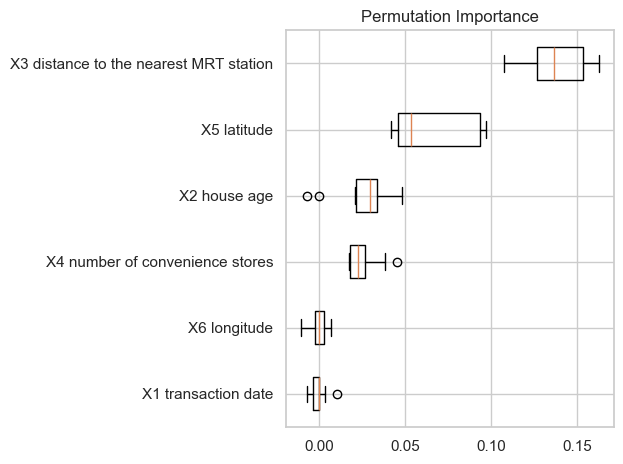

In [59]:
# feature importance
from sklearn.inspection import permutation_importance

result = permutation_importance(reg, X_scaled, y_binary, n_repeats=10, scoring="accuracy", random_state=0, n_jobs=-1)
sorted_idx = result.importances_mean.argsort()

fig, ax = plt.subplots()
ax.boxplot(result.importances[sorted_idx].T, vert=False, tick_labels=X.columns[sorted_idx])
ax.set_title("Permutation Importance")
fig.tight_layout()
plt.show()

Based on this plot, we can see that the most important factor in house value is the distance to nearest metro station. Latitude is the second most important factor, and it might also to be due to distance from the metro line (yellow) as seen in the picture below.
Transaction date seems to have almost no effect on the house value, but number of convenience stores and house age have small effect.

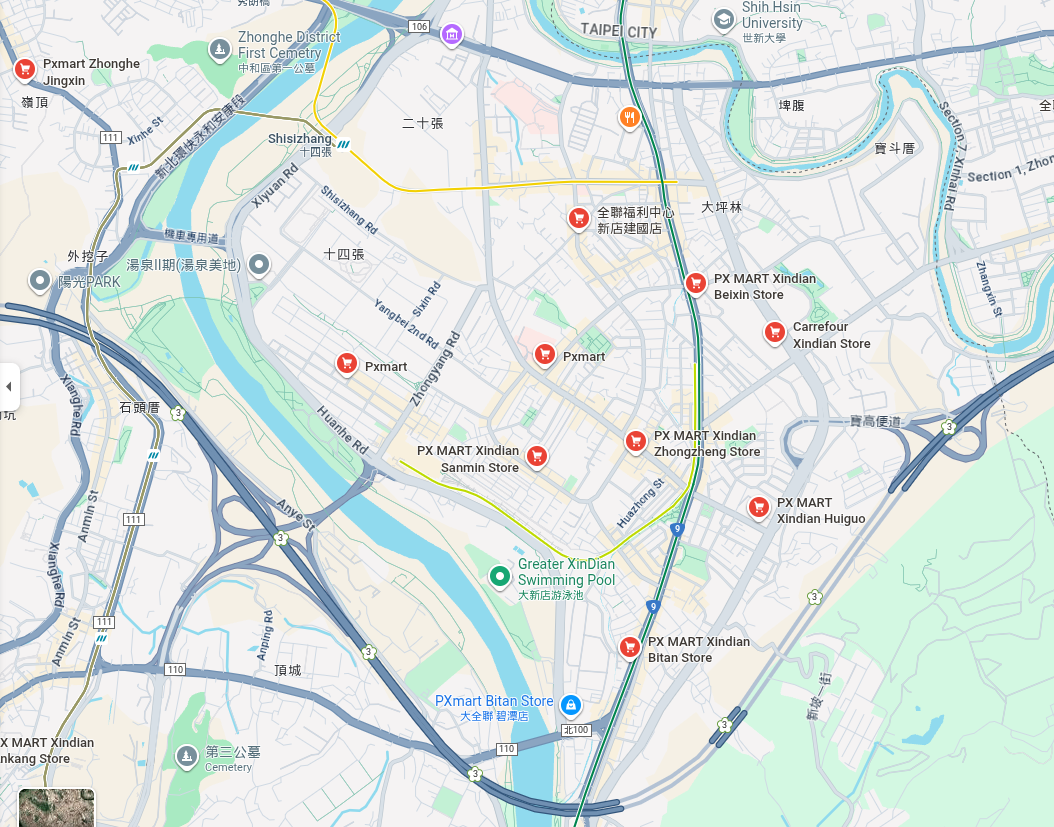

In [60]:
from IPython.display import Image,display;display(Image(filename="map.png"))

Picture source: Google Maps